In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

0 --> no pneumo, 1 --> has pneumo

Data Pre-processing

In [7]:
# re-size all the images to this
IMAGE_SIZE = (50,50)


In [ ]:
x_train=[]
x_test=[]
train_path='Pneumothorax project/train'
test_path='Pneumothorax project/test'

In [9]:
c=0

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img        
        img_arr=cv2.imread(image_path)
        try:
            img_arr=cv2.resize(img_arr,IMAGE_SIZE)
            x_train.append(img_arr)
        except:
            c+=1
            continue
        

print("Number of images skipped= ",c)

Number of images skipped=  0


In [20]:
x_test=[]
c=0

for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img        
        img_arr=cv2.imread(image_path)
        try:
            img_arr=cv2.resize(img_arr,IMAGE_SIZE)
            x_test.append(img_arr)
        except:
            c+=1
            continue
        

print("Number of images skipped= ",c)

Number of images skipped=  0


In [21]:
x_test=np.array(x_test)

In [22]:
x_test=x_test/255.0

In [11]:
x_train=np.array(x_train)


<ipython-input-11-8b5b56e2b34e>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test=np.array(x_test)


In [12]:
x_train=x_train/255.0


In [23]:

datagen = ImageDataGenerator()

train_dataset = datagen.flow_from_directory(train_path,                                      
                                      class_mode = 'binary')


test_dataset = datagen.flow_from_directory(test_path,        
                                      class_mode = 'binary')




Found 15433 images belonging to 2 classes.
Found 1372 images belonging to 2 classes.


In [24]:
train_dataset.class_indices

{'no pneumothorax': 0, 'pneumothorax': 1}

In [25]:
y_train=train_dataset.classes

In [26]:
test_dataset.class_indices

{'no pneumothorax': 0, 'pneumothorax': 1}

In [27]:
y_test=test_dataset.classes

In [28]:
x_train.shape,y_train.shape

((15433, 50, 50, 3), (15433,))

In [29]:
x_test.shape,y_test.shape

((1372, 50, 50, 3), (1372,))

Step-3: Model building

In [76]:
model=Sequential()

#covolution layer
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(50,50,3)))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())


#covolution layer
model.add(Conv2D(128,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#covolution layer
model.add(Conv2D(256,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#i/p layer
model.add(Flatten())


#o/p layer
model.add(Dense(1,activation='sigmoid'))


model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 11, 11, 128)       512       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 256)        

In [77]:
#compile model:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

#Early stopping to avoid overfitting of model

In [79]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,callbacks=[early_stop],shuffle=True)

Epoch 1/30
483/483 [==============================] - 78s 160ms/step - loss: 0.6627 - accuracy: 0.6652 - val_loss: 0.5187 - val_accuracy: 0.7420
Epoch 2/30
483/483 [==============================] - 75s 155ms/step - loss: 0.5563 - accuracy: 0.7220 - val_loss: 0.7194 - val_accuracy: 0.5758
Epoch 3/30
483/483 [==============================] - 75s 155ms/step - loss: 0.4960 - accuracy: 0.7670 - val_loss: 0.4175 - val_accuracy: 0.8163
Epoch 4/30
483/483 [==============================] - 75s 155ms/step - loss: 0.3971 - accuracy: 0.8241 - val_loss: 0.7976 - val_accuracy: 0.6224
Epoch 5/30
483/483 [==============================] - 75s 156ms/step - loss: 0.2870 - accuracy: 0.8799 - val_loss: 0.4938 - val_accuracy: 0.7821
Epoch 6/30
483/483 [==============================] - 75s 156ms/step - loss: 0.1752 - accuracy: 0.9321 - val_loss: 0.6315 - val_accuracy: 0.8069
Epoch 7/30
483/483 [==============================] - 75s 155ms/step - loss: 0.0858 - accuracy: 0.9730 - val_loss: 0.6104 - val_ac

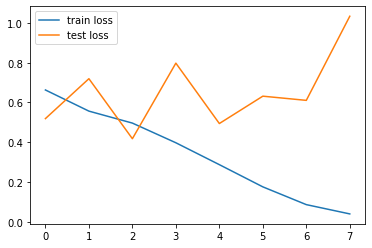

In [80]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='test loss')
plt.legend()

plt.savefig('loss-graph.png')
plt.show()

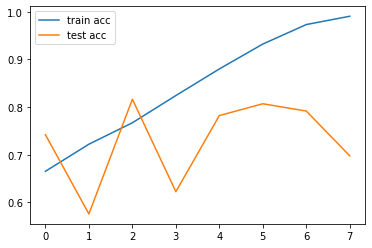

In [81]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.legend()

plt.savefig('acc-graph.png')
plt.show()

In [82]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

In [83]:
accuracy_score(y_pred,y_test)

0.7886297376093294

In [84]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      1372
           1       0.00      0.00      0.00         0

    accuracy                           0.79      1372
   macro avg       0.50      0.39      0.44      1372
weighted avg       1.00      0.79      0.88      1372



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
confusion_matrix(y_pred,y_test)

array([[1082,  290],
       [   0,    0]], dtype=int64)

In [86]:
model_path='pneumothorax-model.h5'

In [87]:
model.save(model_path)

Predicting for an individual image

In [102]:
image_path='Pneumothorax project/no.png'

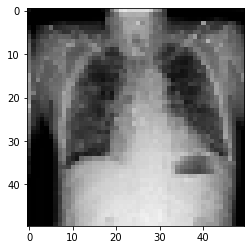

No pneumothorax


In [103]:
img=image.load_img(path,target_size=(50,50))
plt.imshow(img)
plt.show()
    
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
pred=model.predict(images) 

if pred[0][0]==0:
    category="No pneumothorax"
else:
    category="pneumothorax"
        
print(category)   

In [104]:
pred

array([[0.]], dtype=float32)